<a href="https://colab.research.google.com/github/SandeepH2706/IITM_MLT/blob/main/W5_Programming_withoutSol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

This assignments has two sections:
* Linear Regression
* Kernel Regression




# Section 1:

**Linear Regression**

We will use the Boston_housing dataset for the regression problem. Run the below cell to get the following variables:
* `Training_data` = Training data matrix of shape $(n, d)$
* `labels` = label vector corresponding to the training data
* `test_data` = Test data matrix of shape $(n_1, d)$ where $n_1$ is the number of examples in test dataset.
* `test_labels` = label vector corresponding to the test data

Use this dataset for the regression problem.

In [2]:
from keras.datasets import boston_housing
Train, test = boston_housing.load_data(seed= 111)
Training_data, labels = Train[0], Train[1]
Test_data, test_labels = test[0], test[1]

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Question 1
How many examples are there in the training dataset?



In [4]:
Training_data.shape[0]

404

## Question 2
How many examples are there in the test dataset?



In [5]:
Test_data.shape[0]

102

## Question 3

How many features are there in the dataset?



In [ ]:
Training_data.shape[1]


Linear regression model for the dataset ${\mathbb{x}, y}$ is given as
$$h_w(\mathbb{x}) = w_1x^{1}+w_2x^{2}+...+w_dx^{d} =  \mathbb{x}^Tw
$$

where $x^{i}$ is the $i^{th}$ feature, $\mathbb{x}$ is the feature matrix of shape $(d, n)$ and $w = [w_1, w_2, ...w_d]^T$ is the weight vector.


Notice that above model always pass through the origin but for a given dataset, best fit model need not pass through the origin. To tackle this issue, we add an intercept $w_0$ in the model and set the corresponding featrue $x^{0}$ to $1$. That is

$$h_w(\mathbb{x}) =w_0x^{0}+ w_1x^{1}+w_2x^{2}+...+w_dx^{n} =  \mathbb{x}^Tw
$$

We call $x^{0}$ the dummy feature and set its value to 1 for each examples. Now $w$ is of shape $(d+1, 1)$ and $\mathbb{x}$ is of shape $(d+1, n)$ where the first row of $\mathbb{x}$ has entries as 1.


## Task

Add the dummy feature in the feature matrix `Training_data` and test data matrix `test_data`. We will be using this new feature matrices (after adding te dummy feature) for learning the model.

Note: As per your convenience, you can convert the shape of the training dataset to $(d, n)$.

In [6]:
# Add the dummy feature (a column of ones) to the training and test data
Training_data = np.insert(Training_data, 0, 1, axis=1)
Test_data = np.insert(Test_data, 0, 1, axis=1)

# Optional: Transpose the matrices to have shape (d+1, n) if desired
Training_data = Training_data.T
Test_data = Test_data.T

print("Shape of Training_data after adding dummy feature:", Training_data.shape)
print("Shape of Test_data after adding dummy feature:", Test_data.shape)

Shape of Training_data after adding dummy feature: (14, 404)
Shape of Test_data after adding dummy feature: (14, 102)


## Question 4
If the solution of optimization problem is obtained by setting the first derivative of loss function (squared loss) to zero, find the value of $w_0+w_1+...w_d$.




In [7]:
labels = labels.reshape(-1, 1)

# The closed-form solution for the weights w is (X^T * X)^-1 * X^T * y
# where X is the training data matrix (with dummy feature) and y is the labels vector.

# Calculate (X^T * X)
XTX = np.dot(Training_data, Training_data.T)

# Calculate (X^T * X)^-1
XTX_inv = np.linalg.inv(XTX)

# Calculate X^T * y
XTy = np.dot(Training_data, labels)

# Calculate w
w = np.dot(XTX_inv, XTy)

# Calculate the sum of the elements in the weight vector w
sum_of_weights = np.sum(w)

print("Value of w0 + w1 + ... wd:", sum_of_weights)

Value of w0 + w1 + ... wd: 20.5245824646541


## Question 5
Find the average of the predictions made by the above model.



In [8]:
# Make predictions on the test data
predictions = np.dot(w.T, Test_data)

# Reshape predictions to be a 1D array
predictions = predictions.flatten()

# Calculate the average of the predictions
average_prediction = np.mean(predictions)

print("Average of the predictions:", average_prediction)

Average of the predictions: 24.168028424005353


## Question 6

Find the loss for the training data points using the above model. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [12]:
## Enter your solution here
# Calculate predictions for the training data
train_predictions = np.dot(w.T, Training_data).flatten()

# Calculate the squared differences between true labels and predictions
squared_errors = (labels.flatten() - train_predictions) ** 2

# Calculate the mean of the squared errors
mean_squared_error = np.mean(squared_errors)

# Calculate the root mean squared error (loss)
rmse_loss = np.sqrt(mean_squared_error)

print("Loss (RMSE) for the training data:", rmse_loss)

Loss (RMSE) for the training data: 4.552387969840813


## Question 7

Find the loss for the test data points using the above model. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [13]:
# Calculate the squared differences between true labels and predictions
squared_errors_test = (test_labels - predictions) ** 2

# Calculate the mean of the squared errors
mean_squared_error_test = np.mean(squared_errors_test)

# Calculate the root mean squared error (loss)
rmse_loss_test = np.sqrt(mean_squared_error_test)

print("Loss (RMSE) for the test data:", rmse_loss_test)

Loss (RMSE) for the test data: 5.32766221618139


## Question 8
Find the weights using the gradient descent. Use a constant learning rate of $\eta = 10^{-10}$. Initialize the weight vector as zero vector and update the weights for 100 iterations. Enter the sum of all the weights.



In [14]:
# Initialize weights as a zero vector. The shape should be (d+1, 1)
d = Training_data.shape[0] - 1
weights = np.zeros((d + 1, 1))

# Set the learning rate
learning_rate = 1e-10

# Set the number of iterations
num_iterations = 100

# Get the number of training examples
n_train = Training_data.shape[1]

# Perform gradient descent
for i in range(num_iterations):
  # Calculate the predictions
  predictions = np.dot(weights.T, Training_data)

  # Calculate the error (difference between labels and predictions)
  error = labels.T - predictions

  # Calculate the gradient of the cost function
  # The gradient for a single example is -2/n * X * (y - y_hat)
  # For the entire dataset, the gradient is -2/n * X * (Y - Y_hat).T
  gradient = -2/n_train * np.dot(Training_data, error.T)

  # Update the weights
  weights = weights - learning_rate * gradient

# Calculate the sum of all the weights
sum_of_weights_gd = np.sum(weights)

print("Sum of all weights after 100 iterations of gradient descent:", sum_of_weights_gd)

Sum of all weights after 100 iterations of gradient descent: 0.00039286355135382525


## Question 9

Find the loss for the training data points if the model is learnt using the gradient descent as in question 8. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [15]:
# Calculate predictions for the training data using weights from gradient descent
train_predictions_gd = np.dot(weights.T, Training_data).flatten()

# Calculate the squared differences between true labels and predictions
squared_errors_gd = (labels.flatten() - train_predictions_gd) ** 2

# Calculate the mean of the squared errors
mean_squared_error_gd = np.mean(squared_errors_gd)

# Calculate the root mean squared error (loss)
rmse_loss_gd = np.sqrt(mean_squared_error_gd)

print("Loss (RMSE) for the training data using gradient descent:", rmse_loss_gd)

Loss (RMSE) for the training data using gradient descent: 24.045823388028428


## Question 10

Find the loss for the test data points if the model is learnt using the gradient descent as in question 8. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [16]:
# Calculate predictions for the test data using weights from gradient descent
test_predictions_gd = np.dot(weights.T, Test_data).flatten()

# Calculate the squared differences between true labels and predictions
squared_errors_test_gd = (test_labels - test_predictions_gd) ** 2

# Calculate the mean of the squared errors
mean_squared_error_test_gd = np.mean(squared_errors_test_gd)

# Calculate the root mean squared error (loss)
rmse_loss_test_gd = np.sqrt(mean_squared_error_test_gd)

print("Loss (RMSE) for the test data using gradient descent:", rmse_loss_test_gd)

Loss (RMSE) for the test data using gradient descent: 24.888470189616584


## Question 11
Find the weights using the stochastic gradient descent. Use a constant learning rate of $\eta = 10^{-8}$. Initialize the weight vector as zero vector and update the weights for 1000 iterations. . Take the batch size of $⌈\text{number of samples}/5⌉ $. For sampling the batch examples in $ith$ iteration, set seed at $i$. The final weight is the last updated weight. Do not take the avearge of weights updated in all the iterations. Enter the sum of all the weights.




In [20]:
# prompt: i am getting error

# Initialize weights as a zero vector. The shape should be (d+1, 1)
d = Training_data.shape[0] - 1
weights_sgd = np.zeros((d + 1, 1))

# Set the learning rate
learning_rate_sgd = 1e-8

# Set the number of iterations
num_iterations_sgd = 1000

# Get the number of training examples
n_train_sgd = Training_data.shape[1]

# Calculate batch size
batch_size_sgd = int(np.ceil(n_train_sgd / 5))

# Perform stochastic gradient descent
for i in range(num_iterations_sgd):
    # Set the random seed for reproducibility for this iteration
    np.random.seed(i)

    # Randomly select indices for the batch
    batch_indices = np.random.choice(n_train_sgd, batch_size_sgd, replace=False)

    # Get the batch of training data and labels
    training_batch = Training_data[:, batch_indices]
    labels_batch = labels[batch_indices].reshape(-1, 1) # Ensure labels_batch has shape (batch_size, 1)

    # Calculate the predictions for the batch
    predictions_batch = np.dot(weights_sgd.T, training_batch)

    # Calculate the error for the batch
    error_batch = labels_batch.T - predictions_batch

    # Calculate the gradient of the cost function for the batch
    # The gradient for a batch is -2/batch_size * X_batch * (Y_batch - Y_hat_batch).T
    gradient_sgd = -2/batch_size_sgd * np.dot(training_batch, error_batch.T)

    # Update the weights
    weights_sgd = weights_sgd - learning_rate_sgd * gradient_sgd

# Calculate the sum of all the weights after the last update
sum_of_weights_sgd = np.sum(weights_sgd)

print("Sum of all weights after 1000 iterations of stochastic gradient descent:", sum_of_weights_sgd)


Sum of all weights after 1000 iterations of stochastic gradient descent: 0.06524986178321131


## Question 12

Find the loss for the training data points if the model is learnt using the stochastic gradient descent as in question 11. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [21]:
# Calculate predictions for the training data using weights from stochastic gradient descent
train_predictions_sgd = np.dot(weights_sgd.T, Training_data).flatten()

# Calculate the squared differences between true labels and predictions
squared_errors_train_sgd = (labels.flatten() - train_predictions_sgd) ** 2

# Calculate the mean of the squared errors
mean_squared_error_train_sgd = np.mean(squared_errors_train_sgd)

# Calculate the root mean squared error (loss)
rmse_loss_train_sgd = np.sqrt(mean_squared_error_train_sgd)

print("Loss (RMSE) for the training data using stochastic gradient descent:", rmse_loss_train_sgd)

Loss (RMSE) for the training data using stochastic gradient descent: 10.215826867450467


## Question 13

Find the loss for the test data points if the model is learnt using the stochastic gradient descent as in question 11. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.


In [22]:
# Calculate predictions for the test data using weights from stochastic gradient descent
test_predictions_sgd = np.dot(weights_sgd.T, Test_data).flatten()

# Calculate the squared differences between true labels and predictions
squared_errors_test_sgd = (test_labels - test_predictions_sgd) ** 2

# Calculate the mean of the squared errors
mean_squared_error_test_sgd = np.mean(squared_errors_test_sgd)

# Calculate the root mean squared error (loss)
rmse_loss_test_sgd = np.sqrt(mean_squared_error_test_sgd)

print("Loss (RMSE) for the test data using stochastic gradient descent:", rmse_loss_test_sgd)

Loss (RMSE) for the test data using stochastic gradient descent: 9.9055652209872


# Section 2:

**kernel Regression**

We will generate the synthetic dataset for the kernel regression problem. Run the following cell to get the following variables:

`X` = Training data matrix of shape $(n, d)$. In the given dataset $d = 1$.

`y` = label vector corresponding to the training dataset

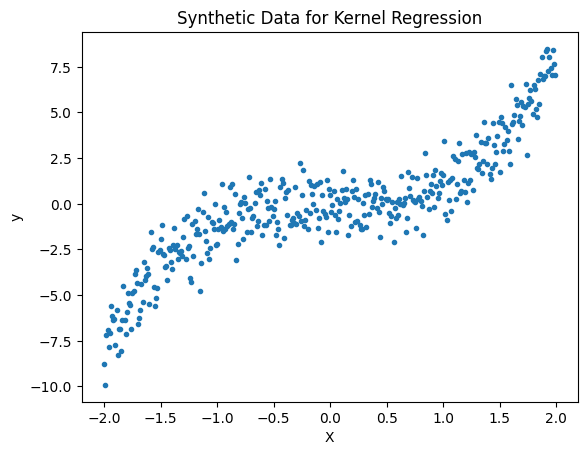

In [24]:
# n = 200
# d = 1
np.random.seed(0)
rng = np.random.default_rng(seed = 101)
X = np.arange(-2, 2, 0.01).reshape(-1, 1)
y = X**3 + rng.normal(0, 1, X.shape[0]).reshape(-1, 1)

plt.figure()
plt.plot(X, y, '.')
plt.title("Synthetic Data for Kernel Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Question 14

Plot the scatter plot between feature and the labels. Enter your answer as 0.



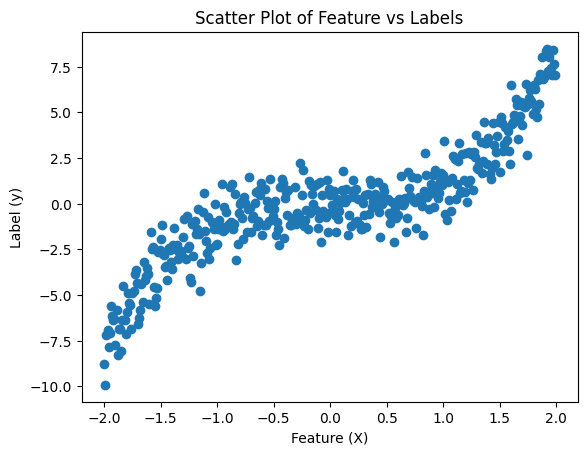

In [25]:
plt.figure()
plt.scatter(X, y)
plt.title("Scatter Plot of Feature vs Labels")
plt.xlabel("Feature (X)")
plt.ylabel("Label (y)")
plt.show()

## Question 15
How many examples are there in the training dataset?



In [26]:
Training_data.shape[0]

14

## Task:

Add the dummy feature in the feature matrix `X`and reshape it to the shape $(d, n)$.

In [27]:
# Add the dummy feature (a row of ones) to the feature matrix X
X = np.insert(X.T, 0, 1, axis=0)

print("Shape of X after adding dummy feature and reshaping:", X.shape)

Shape of X after adding dummy feature and reshaping: (2, 400)


## Question 16

Our task is to apply the kernel regression with polynomial kernel of degree 3. We know that weight vector can be written as

$$w = \phi(\mathbb{x})\alpha$$

let us call the vector $\alpha$ as coefficient vector. Find the sum of elements in the coefficient vector.



In [28]:
# Polynomial kernel function of degree 3
def polynomial_kernel(x1, x2, degree=3):
    return (1 + np.dot(x1.T, x2)) ** degree

# Build the kernel matrix K for the training data
n_samples = X.shape[1]
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = polynomial_kernel(X[:, i].reshape(-1, 1), X[:, j].reshape(-1, 1))

# Ensure y is a column vector
y = y.reshape(-1, 1)

# Calculate the coefficient vector alpha
# alpha = (K)^-1 * y
# Add a small regularization term to the diagonal of K for stability if needed
# identity_matrix = np.eye(n_samples)
# K_regularized = K + lambda_reg * identity_matrix
# alpha = np.dot(np.linalg.inv(K_regularized), y)

alpha = np.dot(np.linalg.pinv(K), y) # Use pseudo-inverse for robustness

# Calculate the sum of elements in the coefficient vector alpha
sum_of_alpha = np.sum(alpha)

print("Sum of elements in the coefficient vector alpha:", sum_of_alpha)

/tmp/ipython-input-28-1742870603.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K[i, j] = polynomial_kernel(X[:, i].reshape(-1, 1), X[:, j].reshape(-1, 1))


Sum of elements in the coefficient vector alpha: -0.018712997436523438


## Question 17

Find the sum of the predictions made by the kernel regression model of degree 3.



In [29]:
# Calculate predictions using the training data kernel matrix K and the learned alpha
predictions_kernel_train = np.dot(K, alpha)

# Calculate the sum of the predictions
sum_of_predictions_kernel_train = np.sum(predictions_kernel_train)

print("Sum of the predictions made by the kernel regression model (on training data):", sum_of_predictions_kernel_train)

Sum of the predictions made by the kernel regression model (on training data): -33.763994216918945


## Question 18

Find the loss for the training data points. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [30]:
# Calculate the squared differences between true labels and predictions
squared_errors_kernel_train = (y - predictions_kernel_train) ** 2

# Calculate the mean of the squared errors
mean_squared_error_kernel_train = np.mean(squared_errors_kernel_train)

# Calculate the root mean squared error (loss)
rmse_loss_kernel_train = np.sqrt(mean_squared_error_kernel_train)

print("Loss (RMSE) for the training data using kernel regression (degree 3):", rmse_loss_kernel_train)

Loss (RMSE) for the training data using kernel regression (degree 3): 1.0064257450692242


### Test dataset

run the following cell to get the test data matrix `X_test` and corresponding label vector `y_test`.

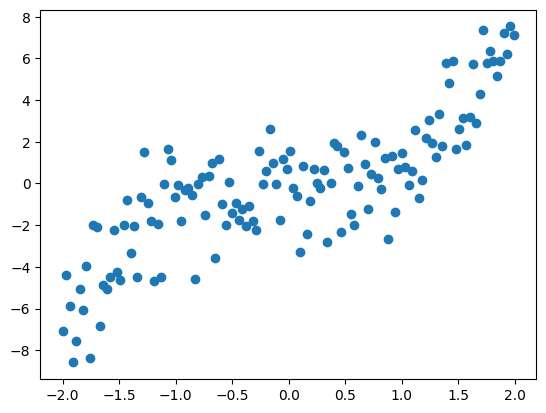

In [31]:
rng = np.random.default_rng(seed = 102)
Xnew = np.arange(-2, 2, 0.03)
ynew = Xnew**3 + rng.normal(0, 1.5, Xnew.shape[0])
X_test = np.column_stack((np.ones(Xnew.shape[0]), Xnew.reshape(-1, 1))).T
y_test = ynew.reshape(-1, 1)
plt.scatter(Xnew,ynew)

## Question 19

Find the loss for the test data points. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [32]:
# Build the kernel matrix K_test between the training data (X) and test data (X_test)
n_train_samples = X.shape[1]
n_test_samples = X_test.shape[1]
K_test = np.zeros((n_test_samples, n_train_samples))
for i in range(n_test_samples):
    for j in range(n_train_samples):
        K_test[i, j] = polynomial_kernel(X_test[:, i].reshape(-1, 1), X[:, j].reshape(-1, 1))

# Calculate predictions for the test data using the learned alpha and K_test
predictions_kernel_test = np.dot(K_test, alpha)

# Calculate the squared differences between true test labels and predictions
squared_errors_kernel_test = (y_test - predictions_kernel_test) ** 2

# Calculate the mean of the squared errors
mean_squared_error_kernel_test = np.mean(squared_errors_kernel_test)

# Calculate the root mean squared error (loss)
rmse_loss_kernel_test = np.sqrt(mean_squared_error_kernel_test)

print("Loss (RMSE) for the test data using kernel regression (degree 3):", rmse_loss_kernel_test)

/tmp/ipython-input-32-341315329.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K_test[i, j] = polynomial_kernel(X_test[:, i].reshape(-1, 1), X[:, j].reshape(-1, 1))


Loss (RMSE) for the test data using kernel regression (degree 3): 1.5684394574764726
